Neste notebook, realizarei uma análise de dados do acelerômetro. O código foi dividido em seções com base nos objetivos e tarefas específicas a serem realizadas. O código foi escrito em Python 3.7.4 e o ambiente de desenvolvimento utilizado foi o Jupyter Notebook.
Começamos importando as bibliotecas necessárias para o projeto. Isso inclui Pandas, Matplotlib, Seaborn e funções do scikit-learn.

In [544]:
import os
import glob
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder

# Machine Learning Libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error

## 1. Carregando os dados
Carregando os dados do acelerômetro ADL e FALL. Os dados estão em formato CSV e cada arquivo contém 5 colunas. As colunas são desconhecidas. A classe é 0 para ADL e 1 para FALL.

In [545]:
# Caminho para as pastas "ADL" e "Fall"
adl_dir = "ADL/Test"
fall_dir = "Fall/Test"

adl_data = pd.DataFrame([], columns=range(5))
fall_data = pd.DataFrame([], columns=range(5))

# Leitura dos dados do acelerômetro ADL
for file_path in glob.glob(os.path.join(adl_dir, "*.csv")):
    df = pd.read_csv(file_path, header=None, )
    adl_data = pd.concat([adl_data, df])
adl_data["Class"] = 0

# Leitura dos dados do acelerômetro FALL
for file_path in glob.glob(os.path.join(fall_dir, "*.csv")):
    df = pd.read_csv(file_path, header=None, )
    fall_data = pd.concat([fall_data, df])
fall_data["Class"] = 1

# Preenchendo valores faltantes com a média dos mais próximos
adl_data = adl_data.fillna(adl_data.mean())
fall_data = fall_data.fillna(fall_data.mean())

## 2. Explorando os dados
Aqui definimos uma função chamada plot_my_data(x, y) que será usada para criar gráficos de dispersão dos dados. A função aceita dois parâmetros, x e y, que são os eixos do gráfico.

In [546]:
def plot_my_data(no_fall_data, with_fall_data, x, y):
    plt.scatter(no_fall_data.loc[:, x], no_fall_data.loc[:, y], color='red', marker='o', label='no fall')
    plt.scatter(with_fall_data.loc[:, x], with_fall_data.loc[:, y], color='blue', marker='x', label='fall')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.legend(loc='upper left')
    plt.savefig(f'{x}_{y}.png', dpi=300)
    plt.show()


### 2.1. Comparando o número de colunas dos DataFrames

In [547]:
if adl_data.shape[1] == fall_data.shape[1]:
    print("Os DataFrames têm o mesmo número de colunas.")
else:
    print("Os DataFrames têm números diferentes de colunas.")

Os DataFrames têm o mesmo número de colunas.


### 2.2. Gráfico de dispersão dos dados
Aqui, usamos a função plot_my_data(x, y) para criar gráficos de dispersão dos dados. Os gráficos de dispersão são criados para cada par de eixos. Isso nos ajuda a entender a distribuição dos dados.

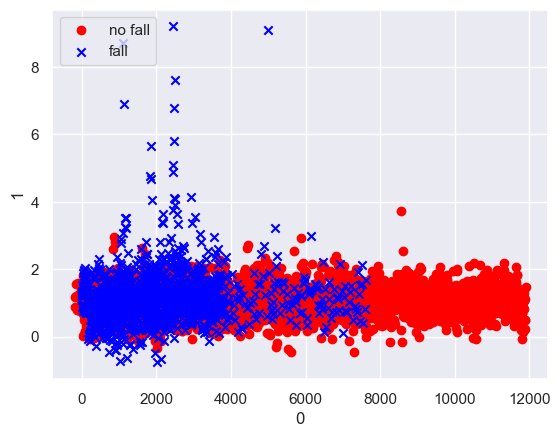

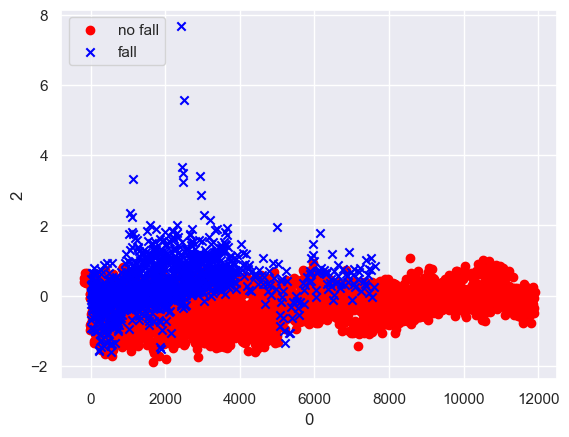

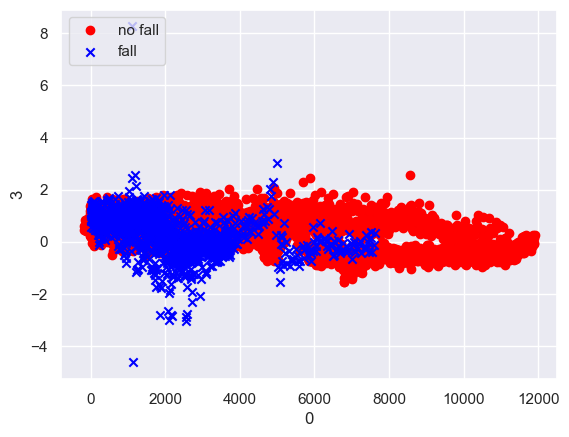

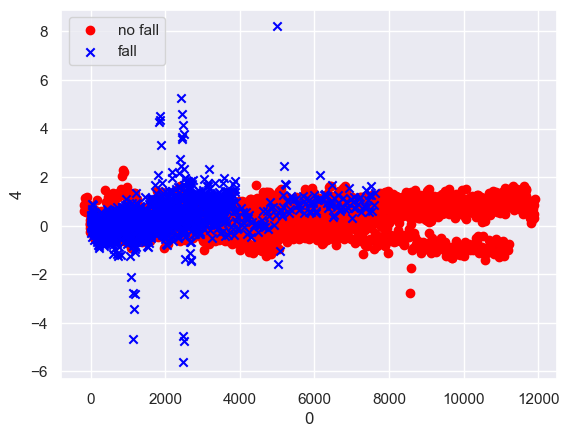

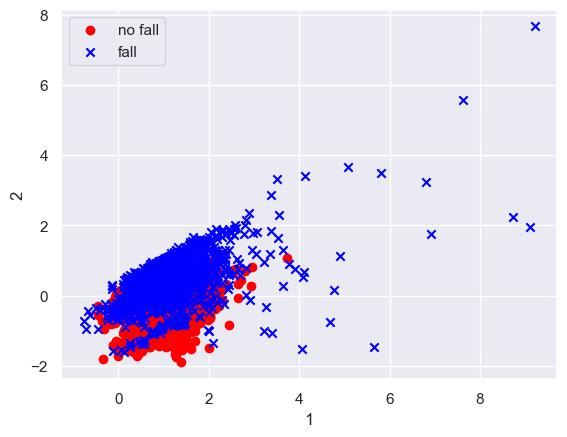

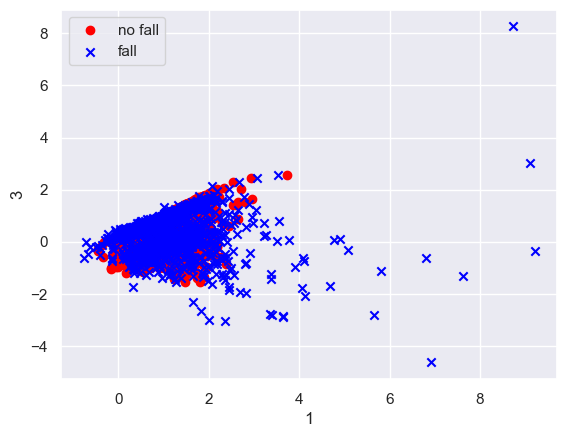

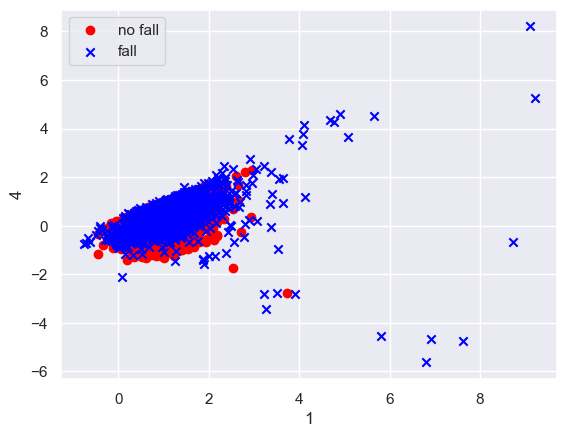

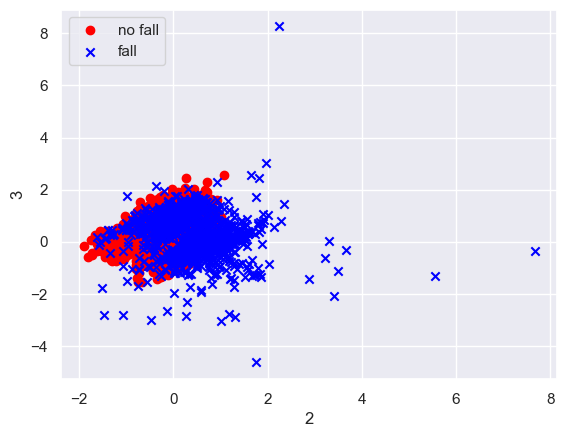

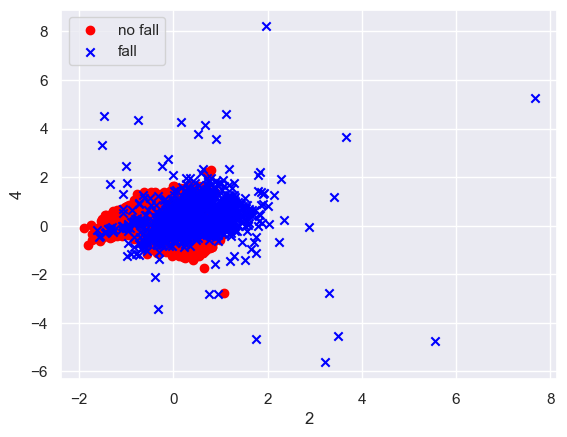

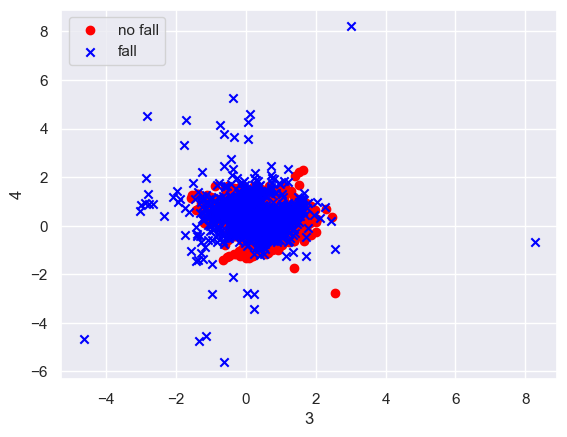

In [548]:
for col in range(5):
    for row in range(col + 1, 5):
        plot_my_data(adl_data, fall_data, col, row)

## 3. Preparando os dados
Aqui, definimos uma função chamada prepare_data(data) que aceita um DataFrame como parâmetro e retorna um DataFrame preparado. A função realiza as seguintes tarefas: 
1. Renomeia as colunas do DataFrame. 
1. Adiciona uma coluna de classe ao DataFrame. 
2. Randomiza o DataFrame. 
3. Redefine os índices do DataFrame.

In [549]:
def prepare_data(nf_data, f_data):
    data = pd.concat([nf_data, f_data])
    data = shuffle(data, random_state=0)
    data = data.reset_index(drop=True)
    print(data.head())
    return data

In [550]:
data = prepare_data(adl_data, fall_data)

        0         1         2         3         4  Class
0  2843.0  1.393364 -1.186467  0.401292  0.193472      0
1   863.0  0.890997 -0.938338  0.398542 -0.188934      0
2   226.0 -0.062770  0.034966 -0.066154 -0.055663      0
3  4325.0  1.224784  0.713034  0.915787  0.136553      1
4   125.0  0.904955  0.393124  0.486159  0.653221      0


In [551]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4314 entries, 0 to 4313
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4314 non-null   float64
 1   1       4314 non-null   float64
 2   2       4314 non-null   float64
 3   3       4314 non-null   float64
 4   4       4314 non-null   float64
 5   Class   4314 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 202.3 KB


In [552]:
data.isnull().sum()

0        0
1        0
2        0
3        0
4        0
Class    0
dtype: int64

In [553]:
data.describe()

,0,1,2,3,4,Class
count,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000,4314.000000
mean,4093.597357,1.082095,-0.078878,0.303431,0.320088,0.303431
std,3177.009468,0.605343,0.629749,0.708800,0.649057,0.459793
min,-187.000000,-0.768083,-1.902290,-4.642436,-5.635713,0.000000
25%,1479.000000,0.726181,-0.436253,-0.224303,-0.064531,0.000000
50%,3233.000000,1.046200,-0.065214,0.310754,0.299723,0.000000
75%,6232.250000,1.370566,0.259045,0.831491,0.739896,1.000000
max,11905.000000,9.204763,7.668606,8.268249,8.206855,1.000000


<Axes: xlabel='Class', ylabel='count'>

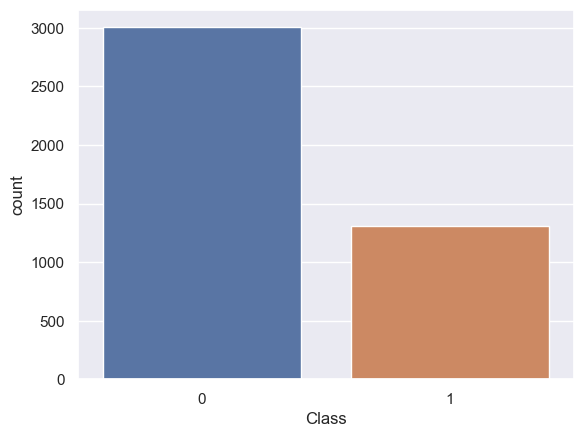

In [554]:
sns.countplot(data, x='Class')

In [555]:
def aux_func(data, column):
        sns.displot(data[column], kde=True)

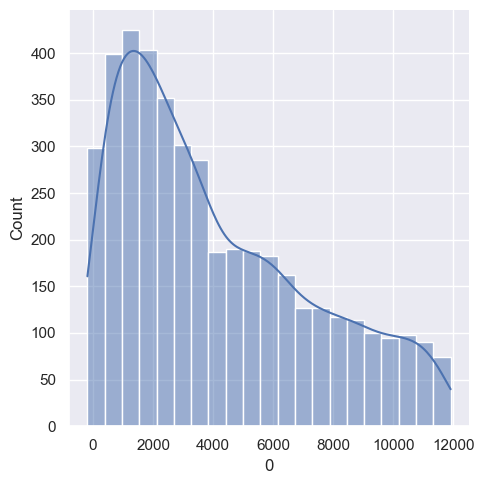

In [556]:
aux_func(data, 0)

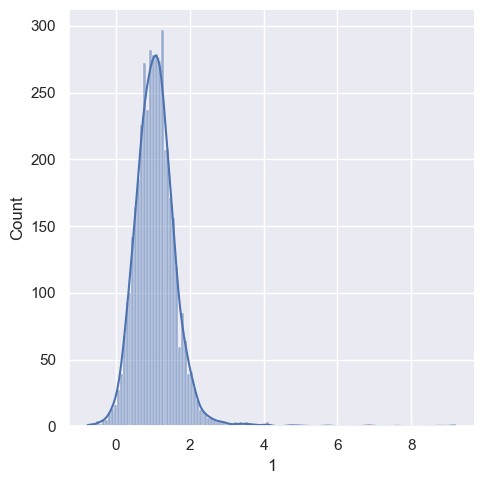

In [557]:
aux_func(data, 1)

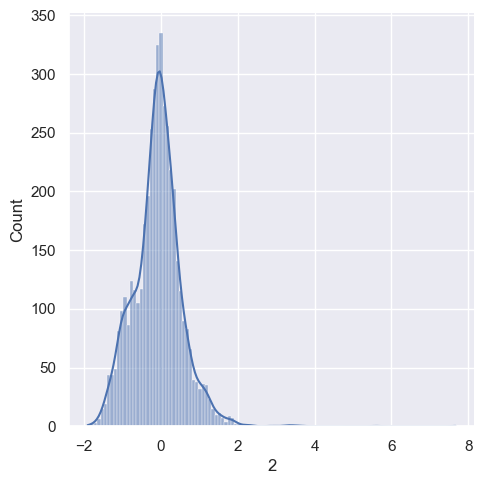

In [558]:
aux_func(data, 2)

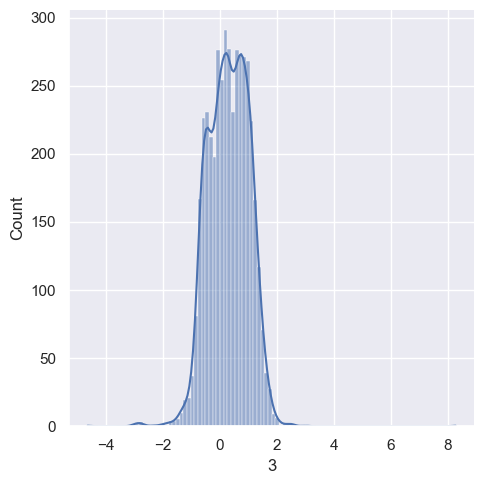

In [559]:
aux_func(data, 3)

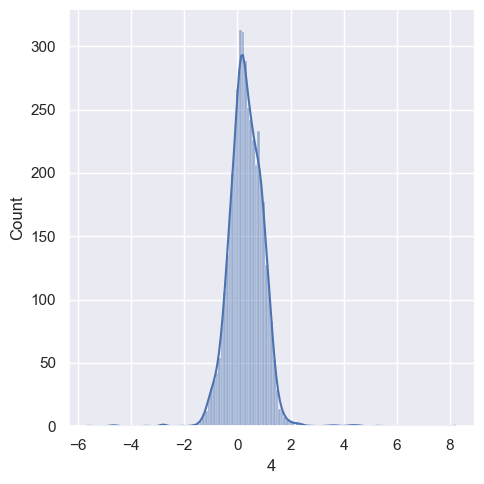

In [560]:
aux_func(data, 4)

   2  Class
0  0      0
1  0      0
2  1      0
3  1      1
4  1      0


<Axes: xlabel='2', ylabel='count'>

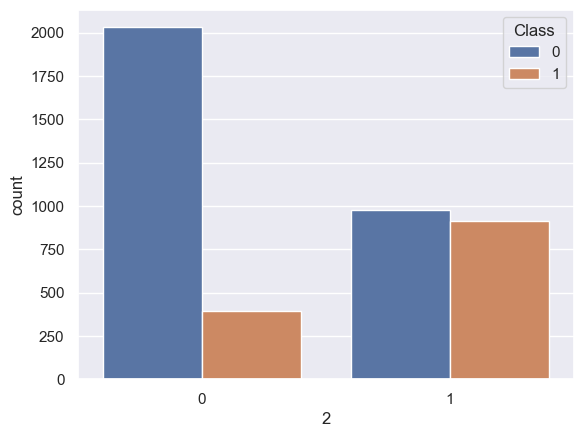

In [561]:
# Mapear os valores negativos -> 0 e positivos ->1
flat_data = pd.DataFrame(data[2])
flat_data = flat_data.applymap(lambda x: 0 if x < 0 else 1)
flat_data['Class'] = data['Class']
print(flat_data.head())
# plotar o grafico da coluna com mais valores negativos
sns.countplot(flat_data, x=2, hue='Class')


## 4. Correlação de variáveis

<Axes: >

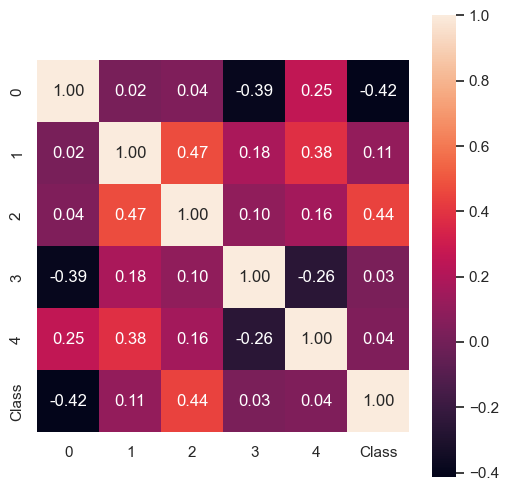

In [562]:
data_corr = data.corr()
plt.figure(figsize=(6, 6))
sns.heatmap(data_corr, square=True, fmt='.2f', annot=True)


# Analizando a relação entre as variáveis e a classe



## 5. Análise de variância

In [563]:
from sklearn.feature_selection import f_classif

# Calculando a pontuação F e o valor p para cada coluna
f_value, p_value = f_classif(data.iloc[:, :-1], data.iloc[:, -1])


##6. Extração de características
Aqui, extraímos as características dos dados. As características são extraídas usando as funções mean(), std() e max() do Pandas, por ex. As características são extraídas para cada linha do DataFrame. As características extraídas são armazenadas em um novo DataFrame chamado features.

In [564]:
# Função para extração de características dada as colunas
def extract_features(data, columns):
    mean_values = data.iloc[:, columns].mean(axis=1)  # Média das colunas
    std_values = data.iloc[:, columns].std(axis=1)  # Desvio padrão das colunas
    max_values = data.iloc[:, columns].max(axis=1)  # Valor máximo das colunas
    amplo_values = data.iloc[:, columns].max(axis=1) - data.iloc[:, columns].min(axis=1)  # Amplitude das colunas
    rms = np.sqrt(np.mean(data.iloc[:, columns] ** 2, axis=1))  # Root Mean Square
    dom = np.sqrt(np.sum(data.iloc[:, columns] ** 2, axis=1))  # Degree of Motion
    ent = np.sum(data.iloc[:, columns] * np.log(data.iloc[:, columns]), axis=1)  # Entropy
    curt = np.sum(data.iloc[:, columns] ** 4, axis=1)  # Kurtosis
    
    features = pd.DataFrame({'Mean': mean_values, 'Std': std_values, 'Max': max_values, 'Amplo': amplo_values,
                             'RMS': rms, 'DOM': dom, 'ENT': ent, 'CURT': curt})
    features["Class"] = data["Class"]
    #g = sns.pairplot(features, hue="Class", height=3)
    #g.fig.suptitle("Colunas: " + str(columns), y=1.08)
    return features

In [565]:
# Extração de características para as colunas 0, 1, 2, 3 e 4
features = extract_features(data, range(5))

# Extração de características para cada par de colunas
#for col in range(5):
#    for row in range(col + 1, 5):
 #       new_features = extract_features(data, [col, row])
 #       features = pd.concat([features, new_features], axis=1)
        
# Extração de características para cada combinação de 3 colunas
#for col1 in range(5):
#    for col2 in range(col1 + 1, 5):
#        for col3 in range(col2 + 1, 5):
#            new_features = extract_features(data, [col1, col2, col3])
 #           features = pd.concat([features, new_features], axis=1)

/Users/mel/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)
/Users/mel/anaconda3/lib/python3.11/site-packages/pandas/core/internals/blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


## 7. Dividindo os dados em treino e teste
Aqui, dividimos os dados em treino e teste. Os dados de treino são usados para treinar o modelo e os dados de teste são usados para testar o modelo. Os dados de treino contêm 70% dos dados e os dados de teste contêm 30% dos dados.

In [566]:
# Trocando os indices do dataframe por letras
numero_para_letra = {0: 'A', 1: 'B', 2: 'C', 3: 'D', 4: 'E', 'Class': 'Class'}
data.columns = data.columns.map(numero_para_letra)
print(data.head())

        A         B         C         D         E  Class
0  2843.0  1.393364 -1.186467  0.401292  0.193472      0
1   863.0  0.890997 -0.938338  0.398542 -0.188934      0
2   226.0 -0.062770  0.034966 -0.066154 -0.055663      0
3  4325.0  1.224784  0.713034  0.915787  0.136553      1
4   125.0  0.904955  0.393124  0.486159  0.653221      0


In [567]:
# Dividindo o dataset em 10 folds
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
scoring = 'accuracy'

### 7.1. Verificando o número de amostras em cada conjunto

In [568]:
print("Número de amostras em treino: " + str(len(X_train)))
print("Número de amostras em teste: " + str(len(X_test)))

Número de amostras em treino: 3451
Número de amostras em teste: 863


## 8. Treinando os modelos

In [569]:
# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection, metrics
from sklearn.model_selection import GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC

In [570]:
# Função auxiliar
def train_model(clf, X_train, y_train, X_test, y_test):
    model = clf.fit(X_train, y_train)
    print("Prediction:    ", list(np.round(clf.predict(X_train[:20]))))
    print("Actual_result: ", list(y_train[:20]))
    score_cal = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
    train_predict = model_selection.cross_val_predict(clf, X_train, y_train, cv=k_fold, n_jobs=-1)
    print("\nAccuracy rate model: ", round(model.score(X_train, y_train) * 100, 2))
    print("Accuracy rate cross val: ", round(score_cal.mean() * 100, 2))
    print("Accuracy rate metrics: ", round(metrics.accuracy_score(y_train, train_predict) * 100, 2))
    y_pred = clf.predict(X_test)
    clf_rmae = mean_absolute_error(y_test, y_pred)
    print("Error rate: %.2f\n" %clf_rmae)

In [571]:
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

def acc_GS(clf, params, X_train, y_train):
    grid = GridSearchCV(clf, params, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_params = grid.best_params_
    print(f"Best Params: {best_params}")
    print(f"Best Score: {grid.best_score_}")

    best_clf = grid.best_estimator_
    best_clf.fit(X_train, y_train)
    accuracy = best_clf.score(X_test, y_test)
    print(f"Acurácia no conjunto de teste: {accuracy}")

    model = grid.best_estimator_
    train_predict = cross_val_predict(model, X_train, y_train)
    print(f"Accuracy CV: {round(accuracy_score(y_train, train_predict) * 100, 2)}")
    print(f"Accuracy GridSearchCV: {round(model.score(X_train, y_train) * 100, 2)}")

    print(f"Recall: {round(recall_score(y_train, train_predict, average='macro') * 100,2)}")
    print(f"F1-Score: {round(f1_score(y_train, train_predict, average='macro') * 100, 2)}")

### 8.0. Selecionando as features treinamento NFY
Faltam mais testes para selecionar as melhores features

In [592]:
X = data
X['Mean'] = features['Mean']
X['Std'] = features['Std']
#X['Max'] = features['Max']
X['Amplo'] = features['Amplo']
#X['RMS'] = features['RMS']
#X['DOM'] = features['DOM']
X['ENT'] = features['ENT']
#X['CURT'] = features['CURT']

# Removendo a coluna 'Class' do dataframe
X = X.drop(['Class'], axis=1)
#X = X.drop(['A'], axis=1)
#X = X.drop(['B'], axis=1)
#X = X.drop(['C'], axis=1)
#X = X.drop(['D'], axis=1)
#X = X.drop(['E'], axis=1)
y = data['Class']

# Conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 8.1. Arvore de decisão

In [593]:
# Árvore de decisão
print("------------ ÁRVORE DE DECISÃO ------------\n")
clf = DecisionTreeClassifier()
train_model(clf, X_train, y_train, X_test, y_test)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

acc_GS(clf, param_grid, X_test, y_test)
print("-------------------------------------------")

------------ ÁRVORE DE DECISÃO ------------

Prediction:     [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
Actual_result:  [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

Accuracy rate model:  100.0
Accuracy rate cross val:  89.99
Accuracy rate metrics:  89.94
Error rate: 0.10


KeyboardInterrupt: 

### 8.2. LogisticRegression

In [574]:
print("\n\n------------LOGISTIC REGRESSION------------\n")
lr = LogisticRegression(max_iter=3000)
train_model(lr, X_train, y_train, X_test, y_test)

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}
acc_GS(lr, param_grid, X_test, y_test)
print("-------------------------------------------")



------------LOGISTIC REGRESSION------------

Prediction:     [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]
Actual_result:  [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

Accuracy rate model:  82.56
Accuracy rate cross val:  80.43
Accuracy rate metrics:  82.38
Error rate: 0.17
Best Params: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8366312676435003
Acurácia no conjunto de teste: 0.8377752027809965
Accuracy CV: 83.66
Accuracy GridSearchCV: 83.78
Recall: 79.07
F1-Score: 79.78
-------------------------------------------


###8.3. KNN

In [575]:
print("\n\n------------KNN------------\n")
knn = KNeighborsClassifier()
train_model(knn, X_train, y_train, X_test, y_test)

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
acc_GS(knn, param_grid, X_test, y_test)
print("-------------------------------------------")



------------KNN------------

Prediction:     [0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0]
Actual_result:  [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

Accuracy rate model:  75.43
Accuracy rate cross val:  61.27
Accuracy rate metrics:  61.49
Error rate: 0.37
Best Params: {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
Best Score: 0.7172939911278398
Acurácia no conjunto de teste: 0.7682502896871379
Accuracy CV: 71.73
Accuracy GridSearchCV: 76.83
Recall: 63.69
F1-Score: 64.23
-------------------------------------------


### 8.4. SVM

In [576]:
print("\n\n------------SVM------------\n")
svm = SVC()
train_model(svm, X_train, y_train, X_test, y_test)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}
#acc_GS(svm, param_grid, X_test, y_test)
print("-------------------------------------------")



------------SVM------------
Prediction:     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Actual_result:  [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

Accuracy rate model:  69.4
Accuracy rate cross val:  69.24
Accuracy rate metrics:  69.4
Error rate: 0.29

-------------------------------------------


### 8.5. Random Forest TBD

In [583]:
print("\n\n------------RANDOM FOREST------------\n")
rf = RandomForestClassifier()
#train_model(rf, X_train, y_train, X_test, y_test)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
#acc_GS(rf, param_grid, X_test, y_test)
print("-------------------------------------------")



------------RANDOM FOREST------------
Prediction:     [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]
Actual_result:  [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]


KeyboardInterrupt: 

### 8.6. Gradient Boosting TBD

In [580]:
print("\n\n------------GRADIENT BOOSTING------------\n")
gb = GradientBoostingClassifier()
#train_model(gb, X_train, y_train, X_test, y_test)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
#acc_GS(gb, param_grid, X_test, y_test)
print("-------------------------------------------")



------------GRADIENT BOOSTING------------

-------------------------------------------


### 8.7. AdaBoost TBD

In [581]:
print("\n\n------------ADABOOST------------\n")
ab = AdaBoostClassifier()
train_model(ab, X_train, y_train, X_test, y_test)

param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.001, 0.01, 0.1, 1]
}
#acc_GS(ab, param_grid, X_test, y_test)
print("-------------------------------------------")



------------ADABOOST------------
Prediction:     [0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0]
Actual_result:  [0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

Accuracy rate model:  85.92
Accuracy rate cross val:  84.05
Accuracy rate metrics:  83.74
Error rate: 0.15

-------------------------------------------


## 9. Avaliando os modelos NFY

In [585]:
# Avaliando os modelos
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('SVM', SVC()))
models.append(('LR', LogisticRegression(max_iter=3000)))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('DT', DecisionTreeClassifier()))

# Avaliando cada modelo em um loop
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, n_jobs=1, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, round(cv_results.mean() * 100, 2), round(cv_results.std() * 100, 2))
    print(msg)

KNN: 61.270000 (2.760000)
RFC: 92.790000 (1.230000)
SVM: 69.240000 (1.850000)
LR: 80.430000 (4.580000)
GB: 89.150000 (1.290000)
AB: 84.080000 (1.300000)
DT: 90.360000 (1.710000)


### 9.1. Comparação dos modelos

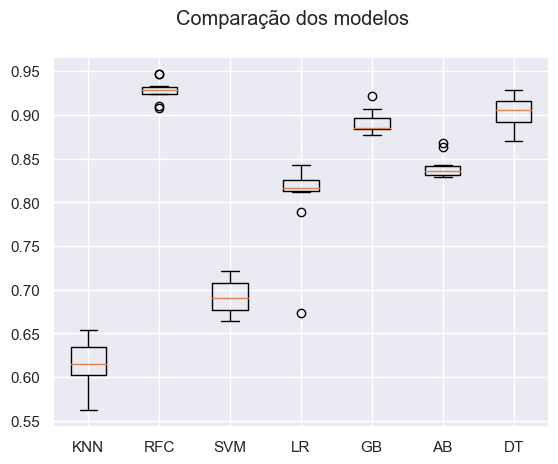

In [586]:
# Comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação dos modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('comparação_modelos.png', dpi=300)
plt.show()

## 10. Conclusão NFY

In [591]:
print("Média de acurácia dos modelos: ", round(np.mean(results) * 100, 2))
print("Desvio padrão dos modelos: ", round(np.std(results) * 100, 2))
#print("Melhor modelo: ", names[np.max(results)])
#print("Pior modelo: ", names[np.max(results)])

Média de acurácia dos modelos:  81.05
Desvio padrão dos modelos:  11.15


AttributeError: 'numpy.float64' object has no attribute 'index'